# Declarations

Please run below to start up.

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
CAR_RATE = 3 # velocity of the car
TIME_CONST = 10000 #zoom in the time
RESOLUTION = 0.1

In [151]:
class Road:
    def __init__(self, city, numOfCell=10, introRate=2, remvRate=2, carRate = 2, direction = (0,1),moveProb=0.5, startPos = (0,0),interval =0.001,totalTime = 1000,name=''):
        #int numOfCell, int introRate, int remvRate, int index
        self.__introRate = introRate
        self.__remvRate = remvRate
        self.carRate = carRate
        self.allCars = [] #cars in this road
        self.numOfCell = numOfCell
        self.passCar = 0 # number of the passing cars
        self.conflict = 0
        self.direction = direction
        self.startPos = startPos
        self.endPos = (startPos[0]+self.direction[0]*(self.numOfCell-1), startPos[1]+self.direction[1]*(self.numOfCell-1))
        #self.cell = {}  #cells in this road
        self.city = city
        self.time_sum_car = 0
        self.density = 0
        self.J = 0
        self.interval = interval
        self.totalTime = totalTime
        self.name = name
        self.moveProb = moveProb
        for i in range(self.numOfCell):
            self.city.map[(self.startPos[0]+self.direction[0]*i, self.startPos[1]+self.direction[1]*i)] = 1
        
    def introCar(self):
        # introduce a new car to this road
        if ((random.random() < self.__introRate*self.interval) and(self.city.map[self.startPos] == 1)):
            self.city.map[self.startPos] = 2
            newCar = Car(self, prob=self.moveProb, interval = self.interval,expClockRate= self.carRate)
            #self.allCars.insert(0, newCar)
            self.allCars.append(newCar)
            
    def remvCar(self):
        # remove the car in the last cell of this road
        if ((random.random() < self.__remvRate*self.interval)and (self.city.map[self.endPos] == 2)):
            self.city.map[self.endPos] = 1
            self.allCars.pop(0)
            self.passCar += 1
            
    def showCar(self):
        for i in range(self.numOfCell):
            if self.city.map[(self.startPos[0]+self.direction[0]*i, self.startPos[1]+self.direction[1]*i)] == 1:
                print(" | "+" ",end="")
            else:
                print(" | "+"*",end="")
        print(" |\n")
    def calculateRate(self):
        self.density = self.time_sum_car/(self.totalTime/self.interval*self.numOfCell)
        self.J = self.passCar / self.totalTime
        

        

In [167]:
class Car:
    def __init__(self, road, position=0, expClockRate=3, prob=0.5,interval =0.001):
        #int position, int expClockRate, float prob, int index (which road)
        self.__position = (road.startPos[0]+road.direction[0]*position, road.startPos[1]+road.direction[1]*position)
        self.__expClockRate = expClockRate
        self.__prob = prob
        self.__road = road
        self.interval = interval
    def moveForward(self):
        if(self.__position==self.__road.endPos):
            return "end"
        if (random.random() < self.__expClockRate*self.interval) and (random.random() < self.__prob):
            # expo & not broken
            if (self.__road.city.map[(self.__position[0]+self.__road.direction[0], self.__position[1]+self.__road.direction[1])] == 1): # next cell is empty
                self.__road.city.map[self.__position] = 1
                self.__position = (self.__position[0]+self.__road.direction[0], self.__position[1]+self.__road.direction[1])
                self.__road.city.map[self.__position] = 2
            elif(self.__road.city.map[(self.__position[0]+self.__road.direction[0], self.__position[1]+self.__road.direction[1])] == 4) and \
            self.__road.city.map[(self.__position[0]+self.__road.direction[0]*2, self.__position[1]+self.__road.direction[1]*2)] == 1:#green light
                self.__road.city.map[self.__position] = 1
                self.__position = (self.__position[0]+self.__road.direction[0]*2, self.__position[1]+self.__road.direction[1]*2)
                self.__road.city.map[self.__position] = 2
            else:
                return "conflict"
                
        return "move"

In [135]:
class City:
    def __init__(self, l=100, w=100,totalTime = 1000,interval = 0.001,name='Berkeley'):
        self.l = l
        self.w = w
        self.map = {(i,j):0 for i in range(self.l) for j in range(self.w)} 
        self.roads=[]
        self.totalTime = totalTime
        self.interval = interval
        self.name = name
        self.J = 0
        self.density = 0
        self.time_sum_car = 0
        self.numOfCell = 0
        self.passCar = 0
    def showCity(self):
        rx = []
        ry = []
        cx = []
        cy = []
        lx = []
        ly = []
        gx = []
        gy = []
        for i in self.map:
            if self.map[i] != 0:
                rx.append(i[0])
                ry.append(i[1])
            if self.map[i] == 2:
                cx.append(i[0])
                cy.append(i[1])
            elif self.map[i] == 3:
                lx.append(i[0])
                ly.append(i[1])
            elif self.map[i] == 4:
                gx.append(i[0])
                gy.append(i[1])
                
            
        plt.plot(rx, ry, marker="o",color="navy",linestyle=" ",markersize=2)
        plt.plot(cx, cy, marker="*",color="y",linestyle=" ")
        plt.plot(lx, ly, marker="s",color="r",linestyle=" ")
        plt.plot(gx, gy, marker="s",color="lightgreen",linestyle=" ")
        plt.show()
        
    def showCitySub(self):
        ax.clear()
        rx = []
        ry = []
        cx = []
        cy = []
        lx = []
        ly = []
        gx = []
        gy = []
        for i in self.map:
            if self.map[i] != 0:
                rx.append(i[0])
                ry.append(i[1])
            if self.map[i] == 2:
                cx.append(i[0])
                cy.append(i[1])
            elif self.map[i] == 3:
                lx.append(i[0])
                ly.append(i[1])
            elif self.map[i] == 4:
                gx.append(i[0])
                gy.append(i[1])
            
        ax.plot(rx, ry, marker="o",color="navy",linestyle=" ",markersize=4)
        ax.plot(cx, cy, marker="*",color="y",linestyle=" ")
        ax.plot(lx, ly, marker="s",color="r",linestyle=" ")
        ax.plot(gx, gy, marker="s",color="lightgreen",linestyle=" ")
        fig.canvas.draw()
    
    def createRoad(self,numOfCell=10, introRate=2, remvRate=2,carRate = 2,moveProb=0.5, direction = (0,1), startPos = (0,0),name = ''):
        newRoad = Road(self, numOfCell=numOfCell, introRate=introRate, remvRate=remvRate, direction = direction, \
                       startPos = startPos,moveProb=moveProb,carRate =carRate, interval = self.interval,totalTime = self.totalTime, name = name)
        self.roads.append(newRoad)
        self.numOfCell += newRoad.numOfCell
    def introCar(self):
        for road in self.roads:
            road.introCar()
            
    def remvCar(self):
        self.passCar = 0
        for road in self.roads:
            road.remvCar()
            self.passCar += road.passCar
    def moveCar(self):
        for road in self.roads:
            for car in road.allCars:
                ret = car.moveForward()
                if ret =="conflict":
                    road.conflict += 1
    def Time_sum_car(self):
        for road in self.roads:
            road.time_sum_car += len(road.allCars)
    def calculateRate(self):
        for road in self.roads:
            road.calculateRate()
            self.time_sum_car += road.time_sum_car
        self.density = self.time_sum_car/(self.totalTime/self.interval*self.numOfCell)
        self.J = self.passCar / self.totalTime
    def light(self, position):
        if random.random < 0.5:
            self.City.map[position] = 3
        else:
            self.City.map[position] = 1
            
    def crossRoadLight(self, position1, position2):
        if random.random() < 0.5:
            self.map[position1] = 3
            self.map[position2] = 1
        else:
            self.map[position1] = 1
            self.map[position2] = 3
            
    def crossRoadLight2(self, position1, position2, position3, position4, counter): #1=3, 2=4
        if(counter % 50 <= 24):
            self.map[position1] = 3
            self.map[position2] = 4
            self.map[position3] = 3
            self.map[position4] = 4
        else:
            self.map[position1] = 4
            self.map[position2] = 3
            self.map[position3] = 4
            self.map[position4] = 3
    def freshMap(self):
        del(self.roads[:])
        self.numOfCell = 0
        self.roads=[]
        self.map = {(i,j):0 for i in range(self.l) for j in range(self.w)} 

# Starter

Run the cell below after running the declaritions above. In this cell, you can customize any parameter you want.

In [157]:
carRate = widgets.FloatSlider(value=3.0,min=0.1, max=100.0, step=0.1, description='carRate: ')
carMoveProb = widgets.FloatSlider(value=0.5,min=0.0, max=1.0,step =0.001, description='moveProb:')

numOfCell = widgets.IntSlider(value=10,min=10, max=100, step=1, description='numOfCell: ')
introRate = widgets.FloatSlider(value=3.0,min=0.1, max=100.0, step=0.1, description='introRate: ')
remvRate = widgets.FloatSlider(value=3.0,min=0.1, max=100.0, step=0.1, description='remvRate: ')

ui = widgets.VBox([carRate, carMoveProb, numOfCell, introRate, remvRate])

def f(carRate, carMoveProb, numOfCell, introRate, remvRate):
    print('Now on our roads: \n'+' The cars move at a speed of '+str(carRate),'\n', 'The probability that each of the cars move is '+str(carMoveProb)+'\n', 'At the same time, there are '+str(numOfCell)+' cars at most on our roads.\n', 'The cars go into the roads at a rate of '+str(introRate)+'\n', 'The cars leave the roads at a rate of '+str(remvRate)+'\n')
    return(carRate, carMoveProb, numOfCell, introRate, remvRate)

out = widgets.interactive_output(f, {'remvRate': remvRate, 'introRate': introRate, 'numOfCell': numOfCell, 'carMoveProb':carMoveProb , 'carRate': carRate})

print('Please use the sliders below to adjust the parameters. They are: carRate, carMoveProb, numOfCell, introRate, remvRate')

display(ui, out)

# print(carRate.value)

# def on_value_change(change):
#     with out:
#         print(change['new'])
#     return change['new']

# print(numOfCell.observe(on_value_change, names='value'))

print("Now we are ready for the simulations.")

Please use the sliders below to adjust the parameters. They are: carRate, carMoveProb, numOfCell, introRate, remvRate


Output()

Now we are ready for the simulations.


# Simulation
First, let's see the road condition for a discrete road.

In [ ]:
%matplotlib notebook
TOTAL_TIME = 100
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

SF = City(totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
SF.createRoad(numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    SF.moveCar()
    SF.showCitySub()
    time.sleep(0.05)
#     print (len(SF.roads[0].allCars),end=' ')

What about crossroads? Let's see what will happen if there are two roads coincident with each other.

<IPython.core.display.Javascript object>


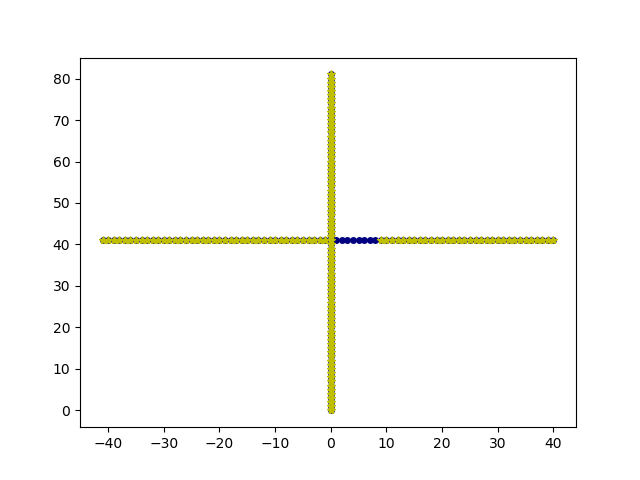

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21

82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82 

KeyboardInterrupt: 

In [164]:
%matplotlib notebook
TOTAL_TIME = 100
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

SF = City(totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
SF.createRoad(numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
SF.createRoad(direction = (1,0), startPos = (-int(numOfCell.value/2),int(numOfCell.value/2)), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    SF.moveCar()
    SF.showCitySub()
    time.sleep(0.05)
#     print (len(SF.roads[0].allCars),end=' ')

<IPython.core.display.Javascript object>


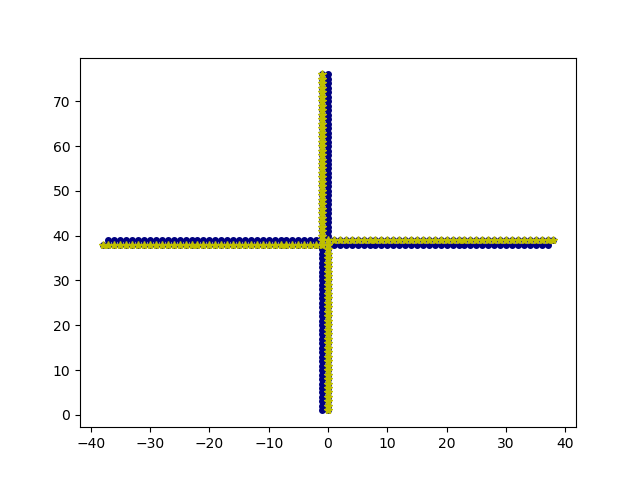

KeyboardInterrupt: 

In [154]:
%matplotlib notebook
TOTAL_TIME = 100
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

SF = City(totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
SF.createRoad(direction = (0,1),startPos = (0,1),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
SF.createRoad(direction = (1,0), startPos = (-int(numOfCell.value/2),int(numOfCell.value/2)), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
SF.createRoad(direction = (0,-1),startPos = (-1,int(numOfCell.value)),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
SF.createRoad(direction = (-1,0), startPos = (int(numOfCell.value/2),int(numOfCell.value/2)+1), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)

startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    SF.moveCar()
    SF.showCitySub()
    time.sleep(0.05)

Since there is a crossroad and we don't have police officers to help keeping the order. We decided to add traffic lights. 

<IPython.core.display.Javascript object>


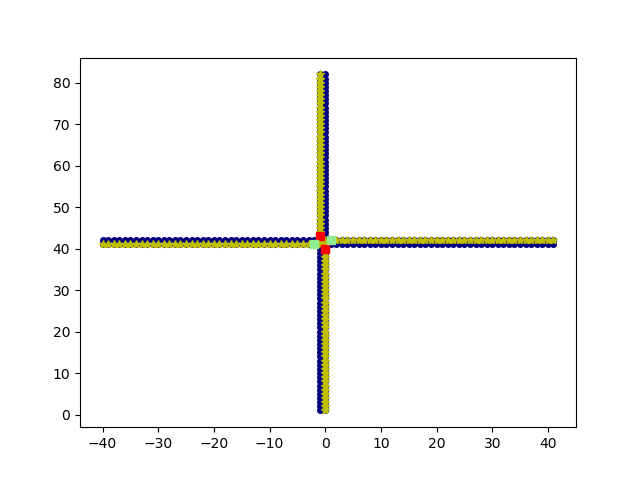

2040608010012014016018020022024026028030032034036038040042044046048050052054056058060062064066068070072074076078080082084086088090092094096098010001020104010601080110011201140116011801200122012401260128013001320134013601380140014201440146014801500152015401560158016001620164016601680170017201740176017801800182018401860188019001920194019601980200020202040206020802100212021402160218022002220224022602280230023202340236023802400242024402460248025002520254025602580260026202640266026802700272027402760278028002820284028602880290029202940296029803000302030403060308031003120314031603180320032203240326032803300332033403360338034003420344034603480350035203540356035803600362036403660368037003720374037603780380038203840386038803900392039403960

In [ ]:
%matplotlib notebook
TOTAL_TIME = 100
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

SF = City(totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
SF.createRoad(direction = (0,1),startPos = (0,1),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
SF.createRoad(direction = (1,0), startPos = (-int(numOfCell.value/2)+1,int(numOfCell.value/2)), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
SF.createRoad(direction = (0,-1),startPos = (-1,int(numOfCell.value)),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
SF.createRoad(direction = (-1,0), startPos = (int(numOfCell.value/2),int(numOfCell.value/2)+1), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)
startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

position1 = (-1,int(numOfCell.value/2)+2)
position2 = (1,int(numOfCell.value/2)+1)
position3 = (0,int(numOfCell.value/2)-1)
position4 = (-2,int(numOfCell.value/2))
counter = 0

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    SF.moveCar()
    SF.crossRoadLight2(position1, position2, position3, position4, counter)
    SF.showCitySub()
    time.sleep(0.05)
    counter += 1
#     print (len(SF.roads[0].allCars),end=" ")
    if(counter % 20 == 0):
        print(counter,end='')

Then, what if we have many roads? You can decide how many roads we have (However, the roads are randomly generated, don't be fraustrated when the roads are ugly).

In [173]:
numRoads = widgets.IntSlider(value=1,min=1, max=100, step=1, description='numRoads: ')

roadsUI = widgets.VBox([numRoads])

def g(numRoads):
    print('Now we have '+str(numRoads)+ ' roads in our city.')
    return numRoads

roadsOut = widgets.interactive_output(g, {'numRoads': numRoads})

print('Please use the sliders below to adjust the number of roads.')

display(roadsUI, roadsOut)


Please use the sliders below to adjust the number of roads.


Output()

<IPython.core.display.Javascript object>


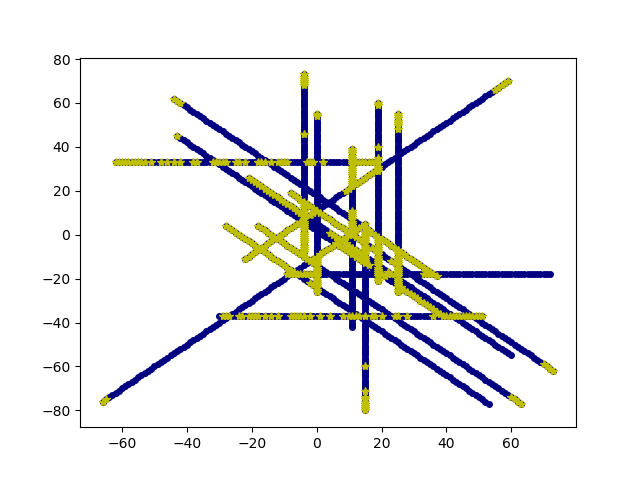

KeyboardInterrupt: 

In [197]:
%matplotlib notebook
TOTAL_TIME = 100
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

SF = City(totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()

for i in range(numRoads.value):
    randDirection = np.random.choice([0,1,-1],size=2)
#     randDirection = np.random.rand(1,2)
#     print(randDirection)
    if (list(randDirection) == [0,1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=0)
    elif(list(randDirection) == [1,1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=0)
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=0)
    elif(list(randDirection) == [1,0]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=0)
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
    elif(list(randDirection) == [0,-1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=0,high=int(numOfCell.value/2))
    elif(list(randDirection) == [-1,0]):
        randStartX = np.random.randint(low=0,high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
    elif(list(randDirection) == [-1,-1]):
        randStartX = np.random.randint(low=0,high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=0,high=int(numOfCell.value/2))
    elif(list(randDirection) == [-1,1]):
        randStartX = np.random.randint(low=0,high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=0)
    elif(list(randDirection) == [1,-1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=0)
        randStartY = np.random.randint(low=0,high=int(numOfCell.value/2))
    else:
        continue
    SF.createRoad(direction = (randDirection[0],randDirection[1]), startPos = (randStartX,randStartY), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=carRate.value)

startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    SF.moveCar()
    SF.showCitySub()
    time.sleep(0.05)